# Športno plezanje

Tu bom naredil projekt pri predmetu Programiranje 1.

## Priprava

Na začetku naložimo paket pandas za delo s podatki. V preambuli je še nekaj vrstic za lepše in lažje delo ter za risanje grafov. Če CSV datoteke še ne obstajajo, jih najprej ustvarimo s pomočjo skripte pripravi_podatke.py.

In [41]:
import pandas as pd

pd.options.display.max_rows = 16

%matplotlib inline

rezultati = pd.read_csv('../podatki.csv')
kategorije = pd.read_csv('../kategorije.csv', index_col='index')
klubi = pd.read_csv('../klubi.csv', index_col='index')
rezultati_klubi = pd.read_csv('../rezultati_klubi.csv')

## Analiza

In [3]:
def preimenuj_stolpec(tabela, stolpec, novo_ime):
    #preimenuje željeni stolpec tabele in vrne tabelo z le preimenovanim stolpcem.
    pomozna_tabela = tabela
    pomozna_tabela[novo_ime] = tabela[stolpec]
    return pomozna_tabela[novo_ime]

In [4]:
rezultati_po_letih = rezultati.groupby("leto")

#povprečno število tekmovalcev glede na kategorijo v posameznih letih
povp_st_tekmovalcev_kat1 = rezultati_po_letih.mean()[["stevilo tekmovalcev", "1. mesto"]]
povp_st_tekmovalcev_kat = preimenuj_stolpec(povp_st_tekmovalcev_kat1, "stevilo tekmovalcev", "povprecno stevilo tekmovalcev")

#število vseh tekmovalcev v posameznem letu
st_tekmovalcev_kat1 = rezultati_po_letih.sum()[["stevilo tekmovalcev", "1. mesto"]]
st_tekmovalcev_kat = preimenuj_stolpec(st_tekmovalcev_kat1, "stevilo tekmovalcev", "stevilo vseh tekmovalcev")

#sedaj ta 2 stolpca združimo
stevilo_tekmovalcev = pd.concat([st_tekmovalcev_kat,povp_st_tekmovalcev_kat], axis=1)
stevilo_tekmovalcev

,stevilo vseh tekmovalcev,povprecno stevilo tekmovalcev
leto,,
2003,269,22.416667
2004,244,20.333333
2005,236,19.666667
2006,244,20.333333
2007,250,20.833333
2008,270,22.500000
2009,268,22.333333
2010,274,22.833333
2011,292,24.333333


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008A71080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008AFE668>], dtype=object)

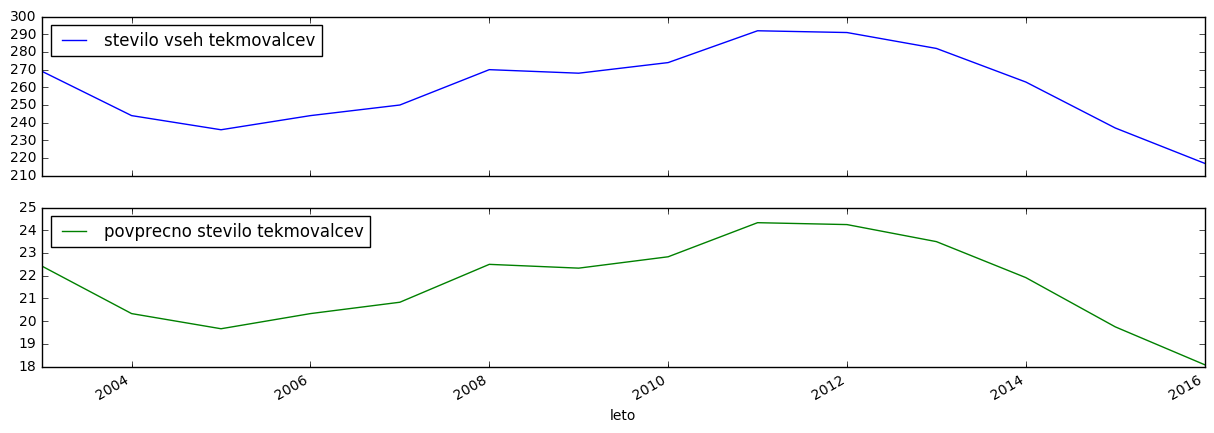

In [5]:
stevilo_tekmovalcev.plot(subplots=True, figsize=(15, 5))

Vidimo, da je bilo v prvih letih večje število tekmovalcev, kar je verjetno posledica same uvedbe tekmovanja, z leti pa je to število seveda upadlo. Število tekmovalcev je nato med letoma 2005 in 2011 raslo kot sem predvideval, sedaj pa se dogaja velik upad števila tekmovalcev kar je v nasprotju z mojimi pričakovanji.

Sedaj podobno preverimo še za mlajše kategorije:

In [8]:
rezultati_po_mlajsih_kat = rezultati[(rezultati["kategorija"] <= 4)]

#povprečno število mlajsih tekmovalcev glede na kategorijo v posameznih letih
povp_st_tekmovalcev_mlajsih_kat1 = rezultati_po_mlajsih_kat.groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]]
povp_st_tekmovalcev_mlajsih_kat = preimenuj_stolpec(povp_st_tekmovalcev_mlajsih_kat1, "stevilo tekmovalcev", "povprecno stevilo tekmovalcev")

#število vseh mlajsih tekmovalcev v posameznem letu
st_tekmovalcev_mlajsih_kat1 = rezultati_po_mlajsih_kat.groupby("leto").sum()[["stevilo tekmovalcev", "1. mesto"]]
st_tekmovalcev_mlajsih_kat = preimenuj_stolpec(st_tekmovalcev_mlajsih_kat1, "stevilo tekmovalcev", "stevilo vseh tekmovalcev")

#sedaj ta 2 stolpca združimo
stevilo_mlajsih_tekmovalcev = pd.concat([st_tekmovalcev_mlajsih_kat,povp_st_tekmovalcev_mlajsih_kat], axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000991F4E0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000090E9470>], dtype=object)

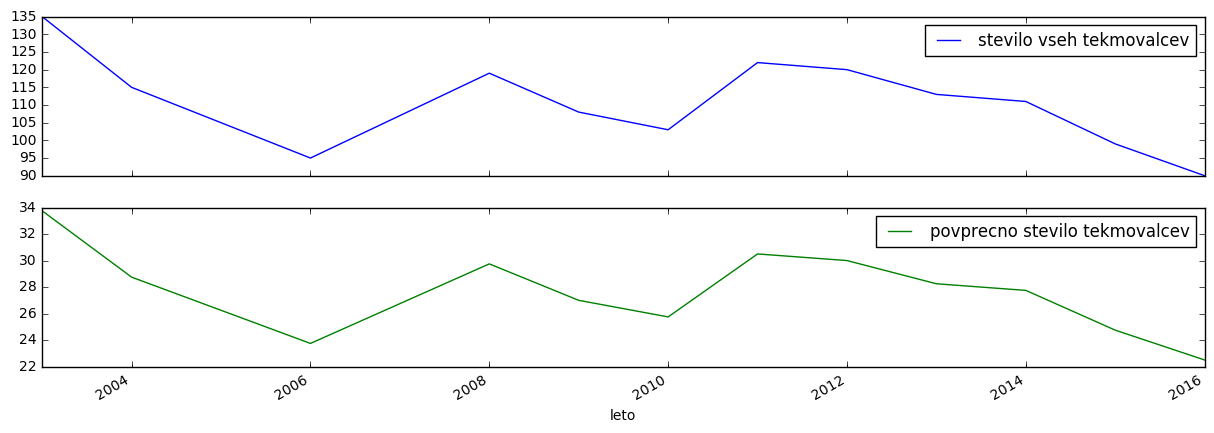

In [9]:
stevilo_mlajsih_tekmovalcev.plot(subplots=True, figsize=(15, 5))

Rezultati pokažejo, da (podobno kot prej) število tekmovalcev sicer do leta 2011 je naraslo vendar pa ne narašča več, Ovržena je torej tudi ta hipoteza.

In [10]:
najvec_tekmovalcev = rezultati["stevilo tekmovalcev"].max()
rezultati[rezultati["stevilo tekmovalcev"] == najvec_tekmovalcev][["leto","kategorija","stevilo tekmovalcev"]]

,leto,kategorija,stevilo tekmovalcev
157,2003,2,43


Kot zanimivost sem pogledal še kdaj in v kateri kategoriji je bilo največ tekmovalcev. Pričakovano je bilo to v najmlajši moški kategoriji. Zanimivo je, da se je to zgodilo v prvem letu od uvedbe samih tekem državnega prvenstva.

In [11]:
#povprečna razlika med prvim in drugim mestom v kategoriji po letih
razlika_prvi_leta = (rezultati_po_letih.mean()["1. mesto"] - rezultati_po_letih.mean()["2. mesto"]) / st_tekmovalcev_kat

#povprečna razlika med prvim mestom in povprečjem točk v kategoriji po letih
povp_razlika_leta = (rezultati_po_letih.mean()["1. mesto"] - rezultati_po_letih.mean()["povprecje"]) / st_tekmovalcev_kat

razlika = pd.concat([razlika_prvi_leta,povp_razlika_leta], axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000914F978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000091E02B0>], dtype=object)

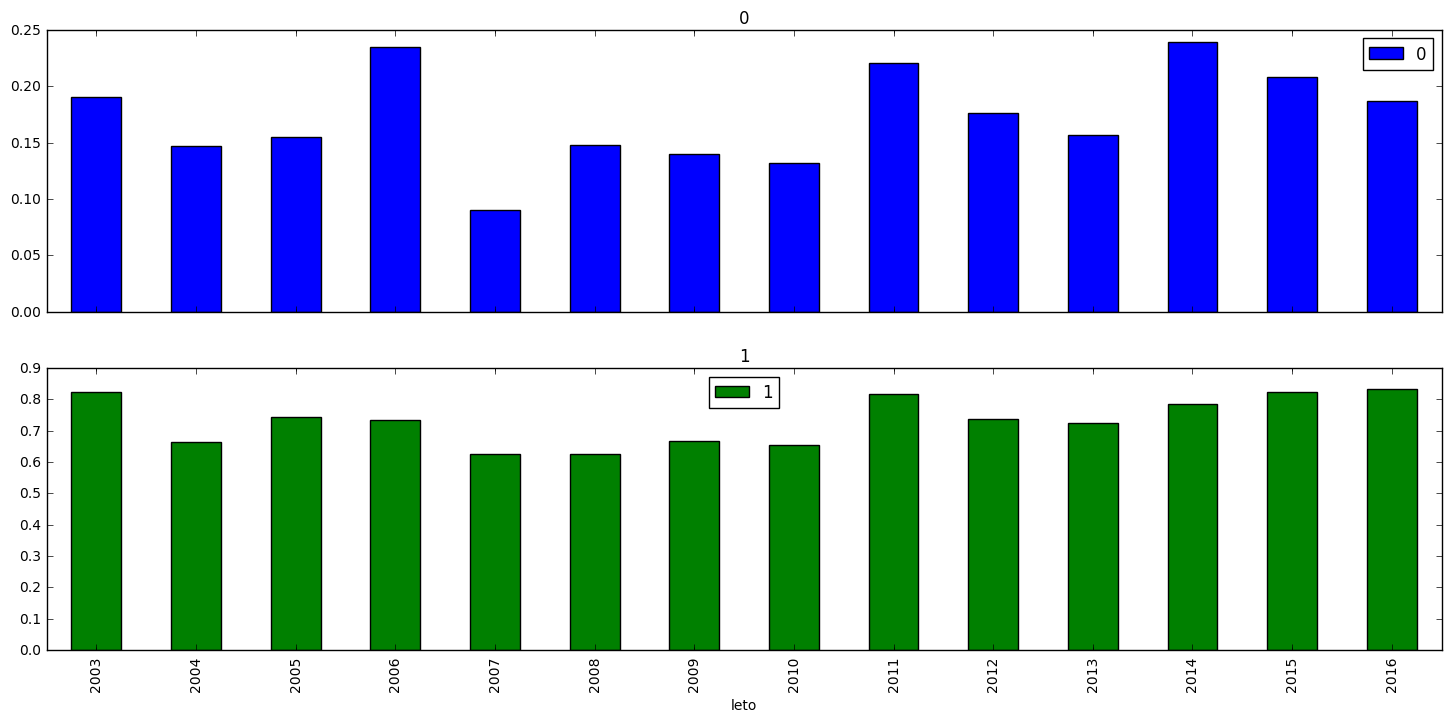

In [12]:
razlika.plot(subplots=True, kind="bar",figsize=(18, 8))

Hipotezo, da so razlike med tekmovalci naključne bom potrdil. Rezultati kažejo, da ta pri najboljših tekmovalcih ni povezana z leti. Pri povprečju so razlike seveda manjše vendar vseeno ni kakšne očitne povezave med let in razlikami med tekmovalci.

In [42]:
#število klubov na leto
rezultati_klubi.groupby("leto").size()

leto
2004    29
2005    26
2006    29
2007    30
2008    32
2009    34
2010    30
2011    30
2012    31
2013    33
2014    35
2015    34
2016    32
dtype: int64

In [13]:
rezultati_po_kategorijah1 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==1].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","cicibanke")
rezultati_po_kategorijah2 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==2].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","cicibani")
rezultati_po_kategorijah3 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==3].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","mlajse deklice")
rezultati_po_kategorijah4 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==4].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","mlajsi decki")
rezultati_po_kategorijah5 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==5].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","starejse deklice")
rezultati_po_kategorijah6 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==6].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","starejsi decki")
rezultati_po_kategorijah7 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==7].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","kadetinje")
rezultati_po_kategorijah8 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==8].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","kadeti")
rezultati_po_kategorijah9 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==9].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","mladinke")
rezultati_po_kategorijah10 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==10].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","mladinci")
rezultati_po_kategorijah11 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==11].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","članice")
rezultati_po_kategorijah12 = preimenuj_stolpec(rezultati[rezultati["kategorija"] ==12].groupby("leto").mean()[["stevilo tekmovalcev", "1. mesto"]],"stevilo tekmovalcev","člani")
rezultati_po_kategorijah = pd.concat([rezultati_po_kategorijah1,
                                      rezultati_po_kategorijah2,
                                      rezultati_po_kategorijah3,
                                      rezultati_po_kategorijah4,
                                      rezultati_po_kategorijah5,
                                      rezultati_po_kategorijah6,
                                      rezultati_po_kategorijah7,
                                      rezultati_po_kategorijah8,
                                      rezultati_po_kategorijah9,
                                      rezultati_po_kategorijah10,
                                      rezultati_po_kategorijah11,
                                      rezultati_po_kategorijah12], axis=1)
#rezultati_po_kategorijah
#rezultati_po_kategorijah.plot(kind='bar',figsize=(20, 20))